# Машинное обучение с учителем. Задачи Регресии.

В случае задач машинного обучения с учителем существует какое-то количество размеченных данных, данных, для
которых определен корректный ответ и корректное предсказание. Мы пытаемся обучить нашу модель на этих данных и потом сделать предсказание на новых данных, которых мы еще не видели.
Далее когда поступают новые данные, не размеченные, наша обученная модель пытается предсказать для них ответ.

В этом разделе мы посмотрим на одну из задач машинного обучения с учителем - это задача регрессии.

**Задача регрессии** (прогнозирования) – построение модели, способной предсказывать численную величину на основе набора признаков объекта.

**Регрессия. Постановка задачи.**

Есть обучающая выборка, в которой представлены объекты в виде из признакового описания (вектор признаков) и значения целевой переменной (непрерывная переменная).

Алгоритм регрессии дл каждого нового объекта (его признакового описания) прогнозирует значение целевой переменной.

Примеры задач регресии:
- Оценка стоимости недвижимости: по характеристике
района, экологической обстановке, транспортной
связности оценить стоимость жилья
- Прогноз свойств соединений: по параметрам
химических элементов спрогнозировать температуру
плавления, электропроводность, теплоемкость
получаемого соединения
- Медицина: по постоперационным показателям оценить
время заживления органа
- Кредитный скоринг: по анкете заемщика оценить
величину кредитного лимита
- Инженерное дело: по техническим характеристикам
автомобиля и режиму езды спрогнозировать расход
топлива

## Линейная регрессия

Линейная регрессия решает задачу обучения с учителем, а значит у нас есть какой-то размеченный набор данных на которые мы обучаемся и потом мы делаем предсказания на новых данных, которых мы еще не видели. В случае линейной регрессии мы предсказываем какуюто вещественную переменную и делаем это пытаясь моделировать линейную зависимость от наших признаков, то есть у нас есть какая-то переменная и она зависит, как мы ожидаем, от других признаков, и мы пытаемся зависимости найти.


В общем случае линейная регрессия описывается уравнением:

`y = w0 + w1*x1 + w2*x2 + ... + wn*xn`

- y - целевая переменная
- x - признаки объекта
- w - веса признаков (потом можно использовать эти веса для того, чтобы понять, какие из наших признаков наиболее важны)

**Пример применения линейной регрессии.**

Предположим, нам задан набор из 7 точек (таблица ниже).

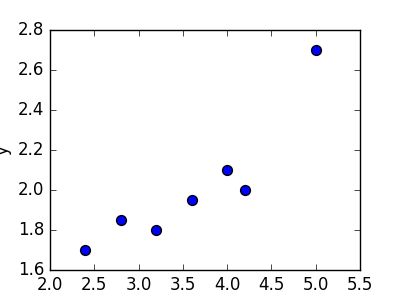

**Цель линейной регрессии** — поиск линии, которая наилучшим образом соответствует этим точкам. 

Общее уравнение для прямой (в том случае если у нас один признак для каждого объекта) $\\ f (x) = w_1*x + w_0 $,  где $\\ w_1 $ — наклон линии, а $\\ w_0 $ — его y-сдвиг. Таким образом, решение линейной регрессии определяет значения для $\\ w_1 $ и $\\ w_0 $, так что f (x) приближается как можно ближе к y. 

Попробуем несколько случайных кандидатов:

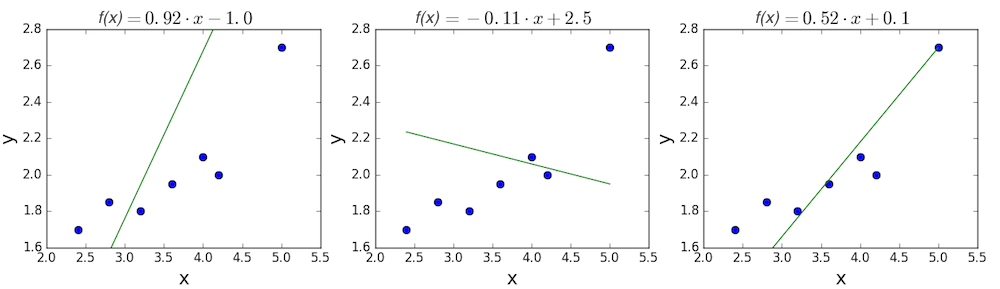

Довольно очевидно, что первые две линии не соответствуют нашим данным. Третья, похоже, лучше, чем две другие. Но как мы можем это проверить? Формально нам нужно выразить, насколько хорошо подходит линия, и мы можем это сделать, определив функцию потерь.

### Функция потерь — метод наименьших квадратов

**Функция потерь** — это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением. Например, взяв строку из среднего примера выше, f(x)=−0.11⋅x+2.5, мы выделяем дистанцию ошибки между фактическими и прогнозируемыми значениями  красными пунктирными линиями.



Одна очень распространенная функция потерь называется **средней квадратичной ошибкой (MSE)**. Суть метода заключается по сути в том, чтобы минимизировать сумму квадратов отклонений фактических значений от расчётных (SSE - «Sum of Squared Errors»). Если полученную сумму разделить на число наблюдений, то получится MSE. Формула целевой функции в этом случае выглядит следующим образом:

$\\ MSE = \frac{1}{T} * \sum_{t=1}^T(y_t-\bar{y_t})^2$

- $\\ y_t $ - правильный ответ 
- $\\ \bar{y_t}$ - предсказание
- T - общее количество элементов выборки

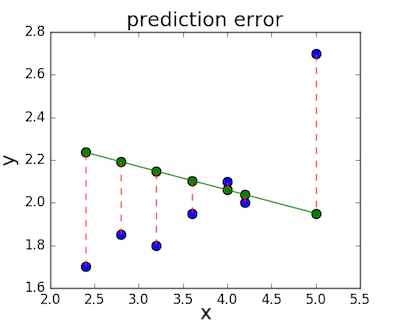

- зеленые точки - это $\\ \bar{y_t}$ - предсказание
- синие точки - это $\\ y_t $ - правильный ответ
- T = 7 - это общее число наблюдений (точек)

Вычислим MSE для каждой из трех функций выше: 
- первая функция дает **MSE = 0,17**
- вторая **MSE = 0,08**
- третья **MSE = 0,02**

Неудивительно, что третья функция имеет самую низкую MSE, подтверждая нашу догадку, что это линия наилучшего соответствия.
В идеальном случае, когда все ответы предсказаны точно, MSE будет равна **нулю**. 

Существуют и другие функции потерь, с помощью который можно найти регрессионную прямую:
- Метод наименьших квадратов
- Метод максимального правдаподобия

И оценки регрессионной модели:
- MSE
- MAE
- R-squered

### Реализация линейной регрессии на Python

In [ ]:
# импортируем необходимые библиотеки

import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Определим простейший набор данных
# Шесть пар точек (5,5), (15,20), (25, 14), (35, 32), (45, 22), (55, 38)

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

Теперь у вас два массива: вход x и выход y. Вам нужно вызвать .reshape() на x, потому что этот массив должен быть двумерным или более точным – иметь одну колонку и необходимое количество рядов. Это как раз то, что определяет аргумент (-1, 1).

In [ ]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [ ]:
y

array([ 5, 20, 14, 32, 22, 38])

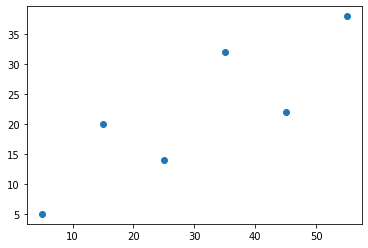

In [ ]:
# Визуализируем наш набор данных
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x, y)

plt.show()

In [ ]:
# Создаем модель линейной регрессии - т.е. прямой которая будет проходить через наши точки
# Эта операция создаёт переменную model в качестве экземпляра LinearRegression

model = LinearRegression()

In [ ]:
# С помощью метода fit() применяем нашу модель к нашему набору данных - обучем модель
# С помощью .fit() вычисляются оптимальные значение весов w₀ и w₁ и т.д, 
# используя существующие вход и выход (x и y) в качестве аргументов. 
# Другими словами, .fit() совмещает модель.

model.fit(x, y)
# y = ax1 +cx2 + b
# a b

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Код выше показывает, как получить w₀ и w₁. Заметьте, что .intercept_ – это скаляр, в то время как .coef_ – массив

In [ ]:
w0 = model.intercept_
w0

5.633333333333329

In [ ]:
print('slope:', model.coef_)

slope: [0.54]


Соответственно, таким образом уравнение нашей регрессионной прямой получается следующей:

$\\ y = w_0 + w_1*x $

$\\ y = 5.633 + 0.54*x $

In [ ]:
# предсказание результатов 
y_pred = model.predict(x)
# y = np.array([5, 20, 14, 32, 22, 38])
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

Применяя .predict(), вы передаёте регрессор в качестве аргумента и получаете соответствующий предсказанный ответ.

Соотвественно, каждый y в массиве y_pred вычисляется с помощью нашей регрессионной прямой: $\\ y = 5.633 + 0.54*x $

У нас имеется набор точек:

```markdown
x  |  y |   y_pred 
---|----|-------------|
5  |  5 | 8.33333333  |
15 | 20 | 13.73333333 |
25 | 14 | 19.13333333 |
35 | 35 | 24.53333333 |
45 | 22 | 29.93333333 |
55 | 38 | 35.33333333 |

```

- y - правильный ответ 
- y_pred - предсказанный ответ нашей модели линейной регрессии

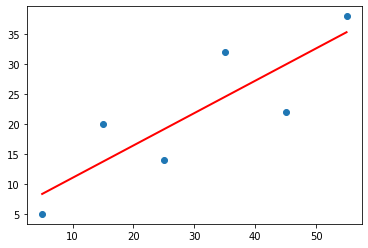

In [ ]:
# визуализируем наши данные и прямую регрессионной модели
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

Теперь мы можем проверить нашу модель посчитав MSE.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 33.756


### Пример более реальной задачи

Применим полученные навыки для анализа данных о ценах на недвижимость в Бостоне, опубликованных в статье 1978 г. Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США.

Подробнее о наборе данных: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [ ]:
import pandas as pd

boston_data = pd.read_csv("Boston.csv")
boston_data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# Данный набор встроен в библиотеку Sickit-learn как обучающий
# Его можно загрузить из библиотеки Sklearn и посмотреть описание датасета

from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# Какие колонки есть в наборе данных
boston_data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
# Выделим вектор признаков и вектор целевой переменной

X = boston_data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat']].values

y = boston_data['medv'].values
# y = w0 + x1*w1 + ... x13*w13

In [ ]:
# сохраним название наших признаков в серию
features = pd.Series(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat'])
features

0        crim
1          zn
2       indus
3        chas
4         nox
5          rm
6         age
7         dis
8         rad
9         tax
10    ptratio
11      black
12      lstat
dtype: object

In [ ]:
# Создадим модель линейной регрессии
slr = LinearRegression()

# Применим линейную регрессию к нашему набору данных 
slr.fit(X, y)

# так как у нас много признаков, а не один как в предыдушем примере,
# то у нас будет много разных коэффицентов для каждого признака
# сохраним их все в датафрейм
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,-0.108011,crim
1,0.046420,zn
2,0.020559,indus
3,2.686734,chas
4,-17.766611,nox
5,3.809865,rm
6,0.000692,age
7,-1.475567,dis
8,0.306049,rad
9,-0.012335,tax


In [ ]:
slr.intercept_

36.45948838509004

Таким образом для каждого признака у нас получились свои веса и итоговое уравнение линейной регрессии будет выглядеть следующим образом:

$\\ y = 35.4595 + -0.108011*crim + 0.046420*zn + ... + -0.524758*lstat $

или

$\\ medv = 35.4595 + -0.108011*crim + 0.046420*zn + ... + -0.524758*lstat $

In [ ]:
# Сделаем все тоже самое, но только возьмем один признак для построениея модели

# выделим вектор признака и вектор ответов
X = boston_data[['lstat']].values
y = boston_data['medv'].values

# создадим модель линейной регрессии
slr = LinearRegression()

slr.fit(X, y)

y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [-0.95004935]
Intercept: 34.5538408793831


Для данного случае у нас уравнение регрессионной модели примет вид прямой (так как всего один признак):


$\\ y = 34.5538 + -0.95*lstat $

или

$\\ medv = 34.5538 + -0.95*lstat $

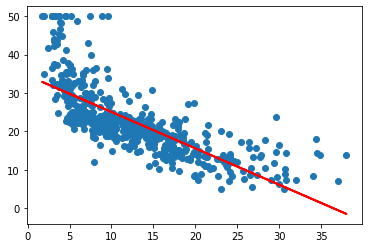

In [ ]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)